In [3]:
%pylab inline
iPath = 'http://opendap.solab.rshu.ru:8080/opendap/hyrax/allData/MODIS_SST_AQUA_4KM_8DAY/2015/'
fn = 'A20150012015008.L3m_8D_NSST_4.bz2'
!ls /media/SOLabNFS2/store/satellite/modis/MODIS_SST_AQUA_4KM_8DAY/2015/A20150012015008.L3m_8D_NSST_4.bz2

Populating the interactive namespace from numpy and matplotlib
/media/SOLabNFS2/store/satellite/modis/MODIS_SST_AQUA_4KM_8DAY/2015/A20150012015008.L3m_8D_NSST_4.bz2


In [4]:
import os
import numpy as np
infile = os.path.join(iPath, fn)

In [5]:
from pydap.client import open_url

In [6]:
dataset = open_url(infile)

In [7]:
l3m = dataset['l3m_data']
l3m_data = dataset['l3m_data'][:]

In [8]:
scale = l3m.attributes['Slope']
offset = l3m.attributes['Intercept']
fill_value = l3m.attributes['Fill']

In [58]:
# l3m_data
l3m_data = np.ma.masked_equal(l3m_data, fill_value)
l3m_data = l3m_data*scale + offset

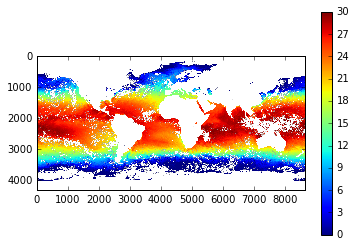

In [124]:
jet()
imshow(l3m_data, vmin=0, vmax=30)
colorbar()

In [115]:
pv_dict = {}

In [116]:
lats = map(lambda x: x/24.0, range(-2160, 2160))
lats = array(lats)
lats += 1/48.0

# lons [-179.97916667, .., 179.97916667], step = 1/24
lons = map(lambda x: x/24.0, range(-4320, 4320))
lon = array(lons)
lon += 1/48.0

pv_dict['lats'] = lats
pv_dict['lons'] = lon

In [117]:
pv_dict['l3m_data'] = l3m_data

In [121]:
print l3m_data.max()
print l3m_data.min()

35.5403301753
-2.0


In [9]:
# l3m_data.shape
fill_value

65535